iter:50 training loss: 0.18685579299926758, val loss: 0.19676366448402405
iter:100 training loss: 0.12154883146286011, val loss: 0.11412033438682556
iter:150 training loss: 0.07447593659162521, val loss: 0.05842689797282219
iter:200 training loss: 0.05277596414089203, val loss: 0.04151501506567001
iter:250 training loss: 0.04283256083726883, val loss: 0.05668707191944122
iter:300 training loss: 0.04403252154588699, val loss: 0.03528384864330292
iter:350 training loss: 0.025682076811790466, val loss: 0.02811318263411522
iter:400 training loss: 0.02985166199505329, val loss: 0.022974014282226562
iter:450 training loss: 0.03543827682733536, val loss: 0.03134666383266449
iter:500 training loss: 0.030225500464439392, val loss: 0.02334779128432274
iter:550 training loss: 0.021886395290493965, val loss: 0.01841595210134983
iter:600 training loss: 0.015912117436528206, val loss: 0.01827082224190235
iter:650 training loss: 0.022001056000590324, val loss: 0.02096172794699669
iter:700 training lo

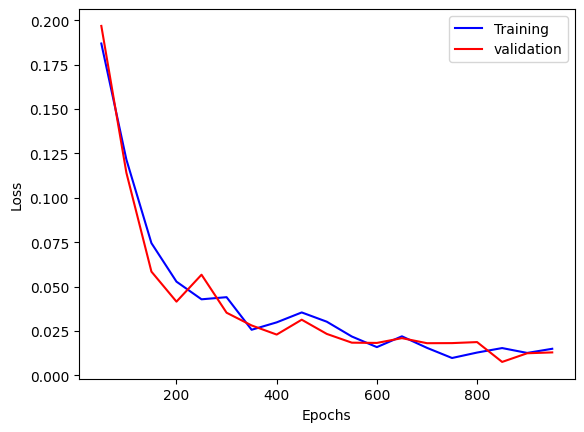

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from dataclasses import dataclass
from utils import *


def sample_data(split = 'train'):
    if split == 'train':
        data =  training_dataset
    else:
        data = validation_dataset
    
    ix = torch.randperm(data.shape[0])[:batch_size]
    
    return data[ix]

learning_rate = 0.003
max_iters = 1000
batch_size = 32

iters = []
loss_value = []
val_loss_value = []

dataset = torch.load("data/hidden.pt")
dataset_size = dataset.shape[0]
training_dataset = dataset[:int(dataset_size*0.5)]
validation_dataset = dataset[int(dataset_size*0.5):]
model = SAE(SAE_Config())

LOAD_MODEL = False
PATH = "models/basic_linear_0.99.bin"
if LOAD_MODEL:
    model = SAE(SAE_Config())
    model.load_state_dict(torch.load(PATH))
    model.eval()
else:
    optimizer = torch.optim.Adam(model.parameters() , learning_rate, weight_decay= 1e-5)
    start_time = time.time()
    step_value = max_iters/20
    for i in range(1, max_iters):
        X= sample_data()
        _, loss,_ = model(X)
    
        if i%step_value ==0 :
            model.eval()
            with torch.no_grad():
                X_V = sample_data(split= 'val')
                _, val_loss, _ = model(X_V)
                iters.append(i)
                loss_value.append(loss.item())
                val_loss_value.append(val_loss.item())
                print(f"iter:{i} training loss: {loss.item()}, val loss: {val_loss.item()}")
            model.train()

        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()


    end_time = time.time()
    print(f"Took {end_time-start_time}s for {max_iters} epochs")

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(iters,loss_value, color='blue', label="Training")
    plt.plot(iters, val_loss_value, "red", label = "validation")
    plt.legend()



        






In [16]:


_, _, hidden = model(training_dataset)

In [17]:
(hidden>0).sum(-1).float().mean()

tensor(1.6266)

In [18]:
(hidden>0.1).sum(0)

tensor([    0, 13145,     0,     0, 13308,     0,  6860,     0,     0,     0,
           11,     0,    12,     0,     0,     4,    11, 13693,     0,    16,
            1, 12602,     1, 12128,     0,     0,     0, 13230,     0, 12902,
            4,     0,     0,     0,    67,  9210, 12531,     0,     0, 13081,
        13013,     1,     0,     0,    11,     0, 13234, 12960,     0,     0])

In [131]:
hidden[5]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.1026, 0.0000, 0.0000, 0.0000, 0.0000, 0.0928, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0766, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0009], grad_fn=<SelectBackward0>)

In [135]:
hidden.max()

tensor(0.5216, grad_fn=<MaxBackward1>)

In [21]:
new = torch.load("models/superpositon.pt")

AttributeError: Can't get attribute 'Model' on <module '__main__'>